# Home Credit - data analysis

Kaggle「Home Credit Default Risk」の各種データについての分析結果

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder


%matplotlib inline

## application.csv
データの読み込み

In [2]:
application_train = pd.read_csv('datasets/application_train.csv')
application_test = pd.read_csv('datasets/application_test.csv')

### データの概要
次元数が非常に多い。trainとtestは"6：1"程度

In [24]:
print('Size of application_train data', application_train.shape)
print('Size of application_test data', application_test.shape)

application_train.head()

Size of application_train data (307511, 122)
Size of application_test data (48744, 121)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 各カテゴリについて
データ型の種類と数

In [4]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

各object型カテゴリのエントリ数

比較的少数のエントリしかないことが分かる。扱い方を考える必要がある。

In [5]:
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### クラスの偏り
非常に大きな偏りがあることもわかる

imbalanced class problemへの対応が重要な要素になるか？

In [6]:
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

### 欠測値とその割合
train, testどちらも欠測が非常に多い

In [7]:
# train data
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [8]:
# test data
total = application_test.isnull().sum().sort_values(ascending = False)
percent = (application_test.isnull().sum()/application_test.isnull().count()*100).sort_values(ascending = False)
missing_application_test_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_test_data.head(20)

,Total,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302


## 簡易的なモデルでの学習
メインのデータセットであるapplication_trainのみを利用して学習を行わせる

### エンコーディング

ラベルエンコーディング（2エントリのもの）

In [3]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in application_train:
    if application_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(application_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(application_train[col])
            # Transform both training and testing data
            application_train[col] = le.transform(application_train[col])
            application_test[col] = le.transform(application_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


one-hot エンコーディング（3エントリ以上）

In [4]:
application_train = pd.get_dummies(application_train)
application_test = pd.get_dummies(application_test)

print('Training Features shape: ', application_train.shape)
print('Testing Features shape: ', application_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


学習データとテストデータの特徴は同じでなければならないが，いくつかテストデータに存在しないものが学習データに含まれている。

そのため，学習データから余分な特徴を除去する。

In [5]:
train_labels = application_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
application_train, application_test = application_train.align(application_test, join = 'inner', axis = 1)

# Add target back in to the data
application_train['TARGET'] = train_labels

print('Training Features shape: ', application_train.shape)
print('Testing Features shape: ', application_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


### 相関係数
各特徴量とターゲット変数のピアソン相関係数を算出する

全体的に単体では弱い相関しかない

In [28]:
# DAYS_BIRTHを負の相関で考えるために絶対値を取る
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])

# ピアソン相関係数を算出
correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations: \n', correlations.tail(15))
print('\nMost Negative Correlations: \n', correlations.head(15))

Most Positive Correlations: 
 OWN_CAR_AGE                                          0.037612
DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negat

#### DAYS_BIRTH
年齢と返済率の関係

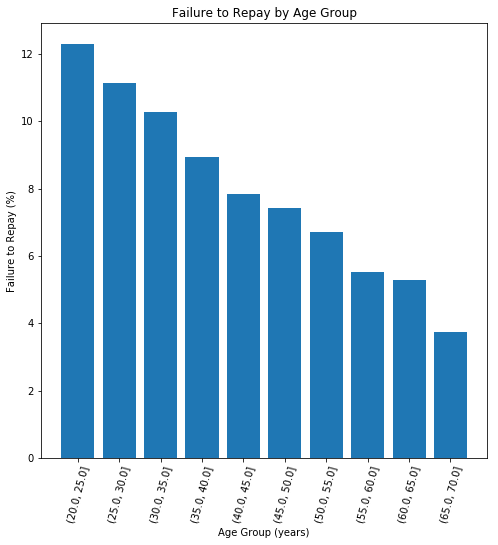

In [29]:
# Age information into a separate dataframe
age_data = application_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()

plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

#### EXT_SOURCE
負の相関が最も高い特徴量

DAYS_BIRTHはEXT_SOURCE_1と正の相関があり、このスコアの要因の1つがクライアントの年齢である可能性があることを示している

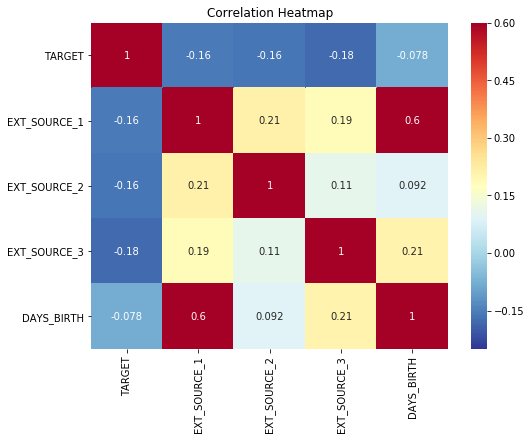

In [30]:
import seaborn as sns

ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()

plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

### 前処理
欠測値補完およびスケーリング

In [6]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
train_labels = application_train['TARGET']
train = application_train.drop(columns = ['TARGET'])
features = list(train.columns)

# Copy of the testing data
test = application_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 239)
Testing data shape:  (48744, 239)


### ロジスティック回帰での学習

In [7]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression()

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

テストデータに対する予測

In [8]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]

提出ファイルの作成

In [9]:
submit = application_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

# Save the submission to a csv file
submit.to_csv('results/log_reg_baseline.csv', index = False)

#### 意外にもこの程度のモデルで精度0.737までは出る

### XGBoostによる学習

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import gc

# Format the training and testing data 
train = np.array(application_train.drop(columns = 'TARGET'))
test = np.array(application_test)

train_labels = np.array(train_labels).reshape((-1, ))

# 10 fold cross validation
folds = KFold(n_splits=5, shuffle=True, random_state=50)

# Validation and test predictions
valid_preds = np.zeros(train.shape[0])
test_preds = np.zeros(test.shape[0])

# Iterate through each fold
for n_fold, (train_indices, valid_indices) in enumerate(folds.split(train)):
    print('n_fold: ', n_fold)
    # Training data for the fold
    train_fold, train_fold_labels = train[train_indices, :], train_labels[train_indices]
    
    # Validation data for the fold
    valid_fold, valid_fold_labels = train[valid_indices, :], train_labels[valid_indices]
    
    # LightGBM classifier with hyperparameters
    clf = XGBClassifier(
        n_estimators=10000,
        learning_rate=0.1,
        subsample=.8,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2
    )
    
    # Fit on the training data, evaluate on the validation data
    clf.fit(train_fold, train_fold_labels, 
            eval_set= [(train_fold, train_fold_labels), (valid_fold, valid_fold_labels)], 
            eval_metric='auc', early_stopping_rounds=100, verbose = False
           )
    
    # Validation preditions
    valid_preds[valid_indices] = clf.predict_proba(valid_fold)[:, 1]
    
    # Testing predictions
    test_preds += clf.predict_proba(test)[:, 1] / folds.n_splits
    
    # Display the performance for the current fold
    print('Fold %d AUC : %0.6f' % (n_fold + 1, roc_auc_score(valid_fold_labels, valid_preds[valid_indices])))
    
    # Delete variables to free up memory
    del clf, train_fold, train_fold_labels, valid_fold, valid_fold_labels
    gc.collect()

n_fold:  0
Fold 1 AUC : 0.752943
n_fold:  1
Fold 2 AUC : 0.754523
n_fold:  2
Fold 3 AUC : 0.759894
n_fold:  3
Fold 4 AUC : 0.752752
n_fold:  4
Fold 5 AUC : 0.755284


In [8]:
submission = application_test[['SK_ID_CURR']]
submission['TARGET'] = test_preds

# Save the submission file
submission.to_csv("results/XGBoost_baseline.csv", index=False)

#### まだ特徴量エンジニアリングも行っておらず，データもapplication_trainしか利用していないため，精度は0.747程度

## 追加のデータ分析結果
aplication_train/application_test以外のデータの分析結果を記載

In [ ]:
POS_CASH_balance = pd.read_csv('datasets/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('datasets/bureau_balance.csv')
previous_application = pd.read_csv('datasets/previous_application.csv')
installments_payments = pd.read_csv('datasets/installments_payments.csv')
credit_card_balance = pd.read_csv('datasets/credit_card_balance.csv')
bureau = pd.read_csv('datasets/bureau.csv')

In [ ]:
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of bureau data', bureau.shape)